# Daily Challenge - Statistics for Machine Learning

# Applying Inferential Statistics

### Here are the hypotheses to test:
1. Age of people who left the bank and who did not are similar. Alternative: Not similar.
2. Credit score of people who left the bank and who did not are similar. Alternative: Not similar.
3. Balance of people who left the bank and who did not are similar. Alternative: Not similar.
4. Estimated Salary of people who left the bank and who did not are similar. Alternative: Not similar.

#### The most appropriate test to analyse data here is Frequentist test.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats
from scipy.stats import t
from scipy.special import stdtr
from numpy.random import seed
import seaborn as sns

%matplotlib inline
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
matplotlib.rcParams['figure.figsize'] = (8.0, 5.0)

In [5]:
## TODO : load the csv file from this link : https://www.kaggle.com/code/vaibhagarwal/inferential-statistics/input

file_1 = pd.read_csv('Churn_Modelling.csv')

In [6]:
## TODO : make into a dataframe called df
df = pd.DataFrame(file_1)

In [7]:
## TODO : output the first 5 lines
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
## TODO : Create two separate DataFrames, `df_0` and `df_1`, to filter customers who have not exited (0) and customers who have exited (1), respectively

df_0 = df[df.Exited == 0]
df_1 = df[df.Exited == 1]

## Hypothesis 1: Age

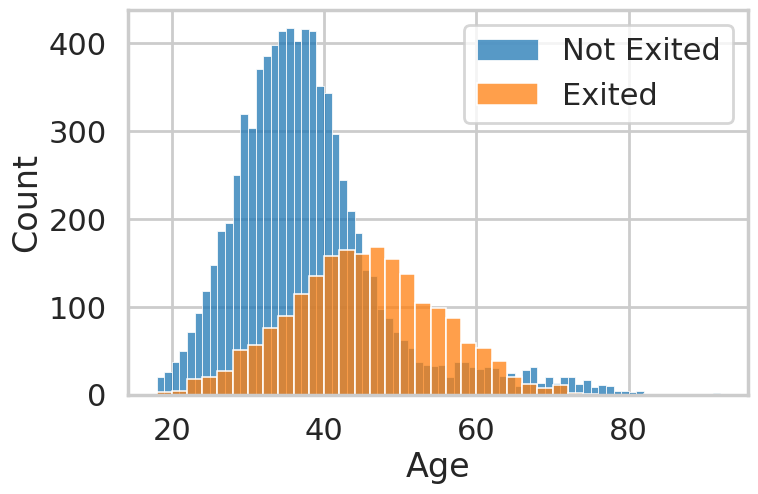

In [9]:
## TODO: Plot the age distribution for customers who stayed with the bank and those who left using seaborn, with different colors for each group and a legend.
sns.histplot(df_0['Age'], label = 'Not Exited')
sns.histplot(df_1['Age'], label = 'Exited')
plt.legend()

In [22]:
## TODO: Calculate the mean and standard deviation of the age for customers who stayed with the bank.
print(f"Age: {int(df_0['Age'].mean())} +/ {int(df_0['Age'].std())}")

Age: 37 +/ 10


In [23]:
## TODO: Calculate the mean and standard deviation of the age for customers who left the bank.
print(f"Age: {int(df_1['Age'].mean())} +/ {int(df_1['Age'].std())}")

Age: 44 +/ 9


In [25]:
## TODO: Perform a t-test to compare the ages of customers who stayed and left the bank.

statistic,p_value = scipy.stats.ttest_ind(df_0["Age"], df_1["Age"], equal_var=False)
p_value

4.7127272656641046e-179

### Using Bootstrapping

In [10]:
## TODO: Write a function to perform bootstrap sampling and calculate the statistic of interest.
def bs_choice(data, func, size):
    bs_s = np.empty(size)
    for i in range(size):
        bs_abc = np.random.choice(data, size=len(data))
        bs_s[i] = func(bs_abc)
    return bs_s

In [11]:
## TODO: Calculate the difference in means and shift the ages to the overall mean.
shift = df_1["Age"].mean()-df_0['Age'].mean()
mean = df["Age"].mean()
print(f"Overall mean: {int(mean)}")
print(f"Difference in means: {int(shift)}")
shift_age_0 = df_0["Age"] + df["Age"].mean() - df_0["Age"].mean()
shift_age_1 = df_1["Age"] + df["Age"].mean() - df_1["Age"].mean()

Overall mean: 38
Difference in means: 7


In [13]:
## TODO: Perform bootstrap sampling to calculate the standard deviation for both groups and their difference.
bs_0 = bs_choice(shift_age_0, np.std, 1000)
bs_1 = bs_choice(shift_age_1, np.std, 1000)
bs_diff = bs_1 - bs_0

In [16]:
## TODO: Calculate the p-value by comparing the difference in means to the bootstrap distribution.
p = np.sum(bs_diff >= shift) / len(bs_diff)
p

0.0

### Conclusion
Do we reject the Null Hypothesis ? Why ?

We can reject the null hypothesis because the p-value is less than 0.05.

## Hypothesis 2: Credit Score

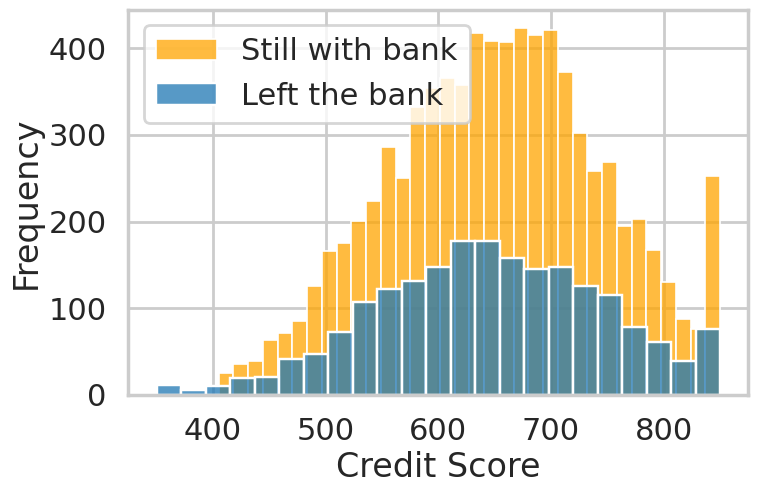

In [24]:
## TODO: Create histograms for the CreditScore distribution of both groups (Still with bank and Left the bank).

sns.histplot(df_0['CreditScore'], color = 'orange', label='Still with bank')
sns.histplot(df_1['CreditScore'], label='Left the bank')
plt.xlabel("Credit Score")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [26]:
## TODO: Perform a t-test to compare the CreditScore between the two groups (Still with bank and Left the bank).
statistics ,pvalue = scipy.stats.ttest_ind(df_0["CreditScore"], df_1["CreditScore"], equal_var=False)
pvalue

0.008464728991832862

### Conclusion
Do we reject the Null Hypothesis ? Why ?

We reject it since the pvalue is less than 0.05.

## Hypothesis 3: Balance

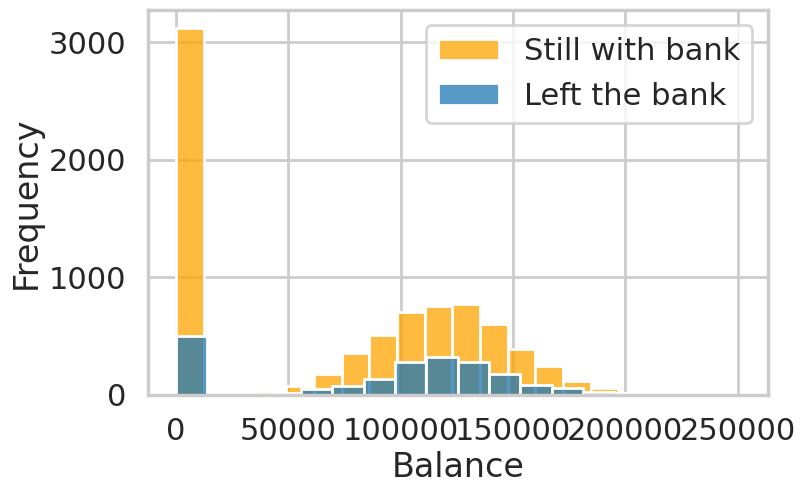

In [28]:
## TODO: Plot the distribution of Balance for both groups (Still with bank and Left the bank).
sns.histplot(df_0['Balance'], color = 'orange', label='Still with bank')
sns.histplot(df_1['Balance'], label='Left the bank')
plt.xlabel("Balance")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [31]:
## TODO: Perform a t-test to compare the Balance between customers who stayed with the bank and those who left.
statistics ,pvalue = scipy.stats.ttest_ind(df_0["Balance"], df_1["Balance"], equal_var=False)
pvalue

6.318663518527974e-35

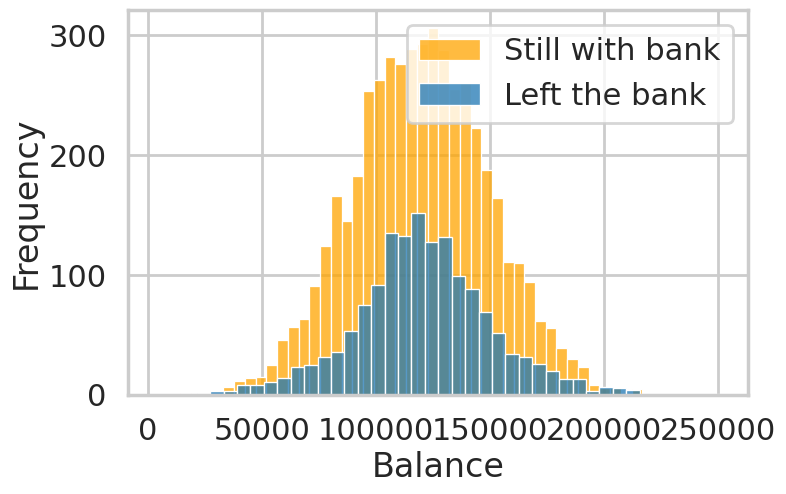

In [30]:
## TODO: Visualize the distribution of Balance for customers who stayed with the bank and those who left, excluding zero balances.
sns.histplot(df_0[df_0["Balance"] != 0]['Balance'], color = 'orange', label='Still with bank')
sns.histplot(df_1[df_1["Balance"] != 0]['Balance'], label='Left the bank')
plt.xlabel("Balance")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [32]:
## TODO: Perform a t-test to compare the Balance between customers who stayed with the bank and those who left, excluding zero balances.
statistics ,pvalue = scipy.stats.ttest_ind(df_0[df_0["Balance"] != 0]["Balance"], df_1[df_1["Balance"] != 0]["Balance"], equal_var=False)
pvalue

0.17379960354870824

## Conclusion

Do we reject the Null Hypothesis ? Why ?

We can't reject the null hypothesis because the pvalue is larger than 0.05.

## Hypothesis 4: Estimated Salary

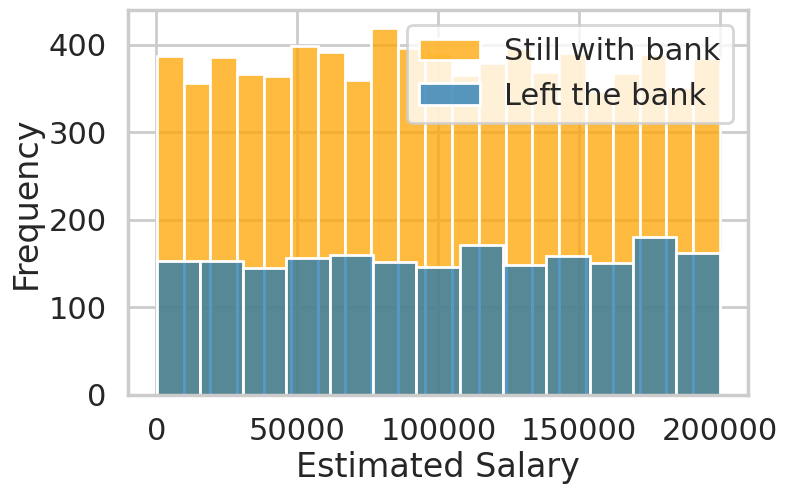

In [33]:
## TODO: Plot the distribution of EstimatedSalary for customers who stayed with the bank and those who left.
sns.histplot(df_0['EstimatedSalary'], color = 'orange', label='Still with bank')
sns.histplot(df_1['EstimatedSalary'], label='Left the bank')
plt.xlabel('Estimated Salary')
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [34]:
## TODO: Perform a t-test to compare the EstimatedSalary between customers who stayed and those who left.
statistics ,pvalue = scipy.stats.ttest_ind(df_0["EstimatedSalary"], df_1["EstimatedSalary"], equal_var=False)
pvalue

0.22892461305145795

### Using Bootstrapping

In [35]:
## TODO: Calculate the difference in means and shift the EstimatedSalary for both groups.
shift = df_1["EstimatedSalary"].mean()-df_0["EstimatedSalary"].mean()
mean = df["EstimatedSalary"].mean()
print(f"Overall mean: {int(mean)}")
print(f"Difference in means: {int(shift)}")
shift_age_0 = df_0["EstimatedSalary"] + df["EstimatedSalary"].mean() - df_0["EstimatedSalary"].mean()
shift_age_1 = df_1["EstimatedSalary"] + df["EstimatedSalary"].mean() - df_1["EstimatedSalary"].mean()

Overall mean: 100090
Difference in means: 1727


In [38]:
## TODO: Calculate the bootstrap sample means for both groups and their difference.
bs_0 = bs_choice(shift_age_0, np.std, 10000)
bs_1 = bs_choice(shift_age_1, np.std, 10000)
bs_diff = bs_1 - bs_0

In [39]:
## TODO: Calculate the p-value based on the bootstrap distribution of the difference in means.
p = np.sum(bs_diff >= shift) / len(bs_diff)
p

0.0235

### Conclusion
Do we reject the Null Hypothesis ? Why ?

Using bootstrap we can reject the null hypothesis becasue the p-value is less than 0.05, however with the t-test the p-value is larger than this number.

## Final Conclusion
What will be the most helpful feature in predicting churning?


The most helpful features when predicting churning will be Age, Credit Score and Balance only when we exclude Zero Balance.